# Importing Libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
colors = ['#1192AA','#00B8C0', '#73D4D3', '#90F2F0']
import numpy as np
import seaborn as sns

# Loading Dataset

In [2]:

# Read the Excel file
data = pd.read_excel('dataset.xlsx', engine='openpyxl')

## Data Cleaning

In [3]:
data.loc[data.duplicated()]
# drop unnecessary columns
data = data.drop(columns=["Customer Name"])

# drop duplicated data
data = data.drop_duplicates()

# Task 1.1

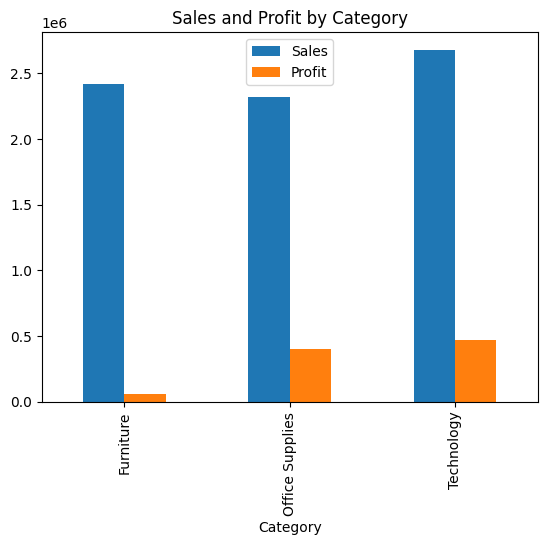

In [47]:
category_sales = data.groupby(['Category'])[['Sales', 'Profit']].sum()

# Plotting
category_sales.plot(kind='bar')
plt.title('Sales and Profit by Category')
plt.show()


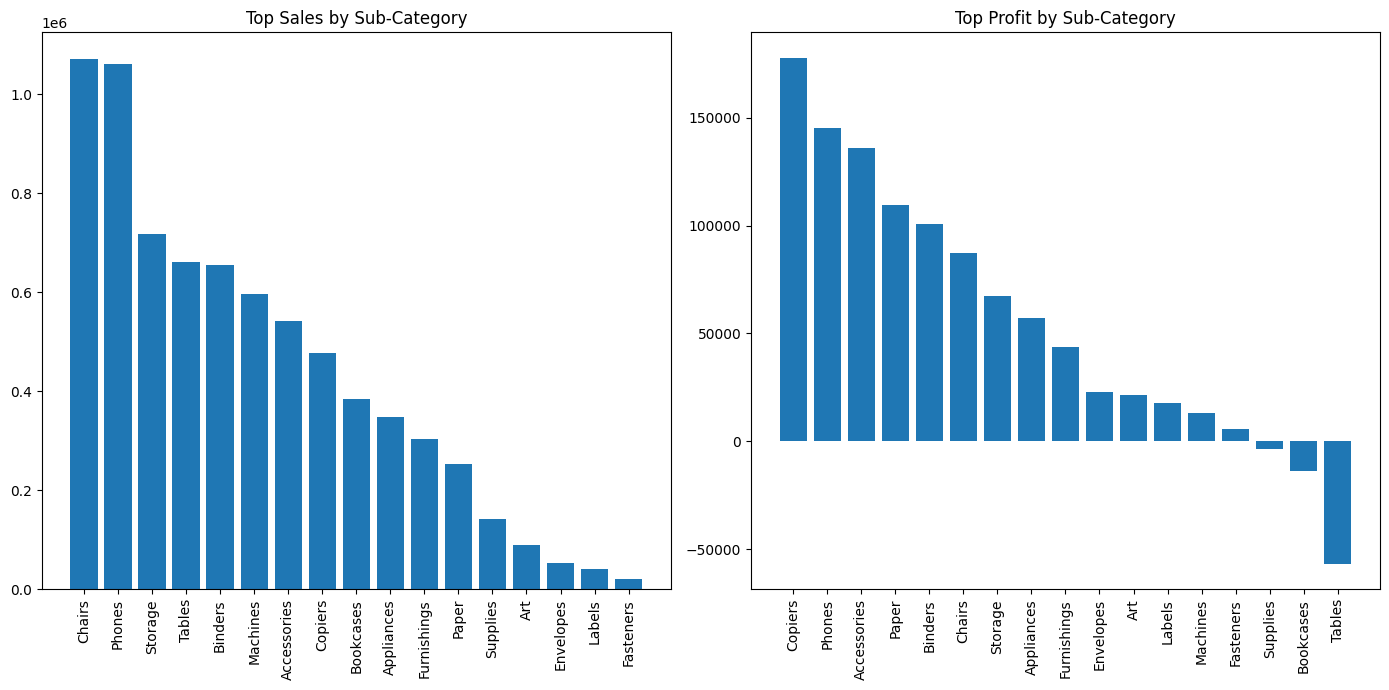

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


# data = pd.read_csv('sales_data.csv')


# Aggregate sales and profit by category and sub-category
category_sales_profit = data.groupby(['Category', 'Sub-Category'])[['Sales', 'Profit']].sum().reset_index()

# Identify top-performing products
top_sales = category_sales_profit.sort_values(by='Sales', ascending=False)
top_profit = category_sales_profit.sort_values(by='Profit', ascending=False)

# Visualization
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.bar(top_sales['Sub-Category'], top_sales['Sales'])
plt.title('Top Sales by Sub-Category')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.bar(top_profit['Sub-Category'], top_profit['Profit'])
plt.title('Top Profit by Sub-Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


In [50]:
## CREATE NEW TABLE
# group by category and subcategory
margin_per_subcategory = data.groupby(['Category', 'Sub-Category'], as_index=False)[['Sales', 'Profit']].sum()
margin_per_subcategory['Profit Margin'] = margin_per_subcategory['Profit'] / margin_per_subcategory['Sales'] * 100

# sort values by Sales
margin_per_subcategory.sort_values(by='Profit Margin', inplace = True)


## PLOT
# bar chart
fig = px.bar(x = margin_per_subcategory['Profit Margin'],
             y = margin_per_subcategory['Sub-Category'],
             color = margin_per_subcategory['Category'],
             orientation = 'h',
             template = 'simple_white', 
             color_discrete_sequence = np.flip(colors))

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Profit Margin (%)",
    yaxis_title="Sub-Category",
    legend_title="Category",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Profit Margin by Category & Sub-Category",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

## Inference: 
* **Technology is the clear leader for profits and sales across categories.**
* **Most of the orders got 10-40% profit margin value**
* **Chairs and Phones are the most sold products. While copiers are the product with highest profits.**




# Task 1.2

In [16]:
# create table
orders_with_discount = data.copy()
orders_with_discount['With Discount'] = orders_with_discount['Discount'].apply(lambda x: x > 0)
orders_with_discount.replace({False: 'Without Discount', True: 'With Discount'}, inplace = True)

orders_with_discount_sales = orders_with_discount[['With Discount', 'Sales']].groupby('With Discount', as_index = False).sum()

# plot
fig = go.Figure(go.Pie(labels = orders_with_discount_sales['With Discount'],
                 values = orders_with_discount_sales['Sales'],
                 )
        )
fig.update_traces(
    marker=dict(
            colors=colors,
            line=dict(
                    color='#000000', 
                    width=1
            )
    ),
    hole = 0.45
)

#Set Title and x/y axis labels
fig.update_layout(
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Sales by Order Type<br>(With Discount/Without Discount)",
        'y':0.9,
        'x':0.1
        },
    template = 'simple_white',
    )

fig.show()

In [17]:
fig = px.histogram(x = orders_with_discount['Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Category and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

In [18]:
fig = px.histogram(x = orders_with_discount['Sub-Category'],
             color = orders_with_discount['With Discount'], barmode='group',
             template = 'simple_white', color_discrete_sequence = ['#00B8C0', '#1192AA'])

#Set Title and x/y axis labels

fig.update_traces(marker_line_color='black',
                  marker_line_width=.5)

fig.update_layout(
    xaxis_title="Sub-Category",
    yaxis_title="Number of Orders",
    legend_title = "Discount",
    showlegend = True,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Frequency of Orders by Sub-Category and Order Type<br>(With Dicount / Without Discount)",
        'y':0.95,
        'x':0.5
        },
    bargroupgap=0.1
    )

fig.show()

## Inference: 
* **Considering Sub-Category there are some subcategories with high number of orders with discount (for example blinders, phones, chairs) and some orders with high number of orders without discount (for example paper, furnishing, storage).**
* **Furniture had the highest impact after promotions.**

# Task 1.3

In [40]:
consumer_orders = data[data['Segment'] == 'Consumer']
corporate_orders = data[data['Segment'] == 'Corporate']
home_office_orders = data[data['Segment'] == 'Home Office']
consumer_orders_grouped = consumer_orders.groupby(pd.Grouper(key='Order Date', axis=0,
                      freq='M'))['Order ID'].count().reset_index()
home_office_orders_grouped = home_office_orders.groupby(pd.Grouper(key='Order Date', axis=0,
                      freq='M'))['Order ID'].count().reset_index()
corporate_orders_grouped = corporate_orders.groupby(pd.Grouper(key='Order Date', axis=0,
                      freq='M'))['Order ID'].count().reset_index()



Text(0.5, 1.0, 'Consumer Orders Frequency')

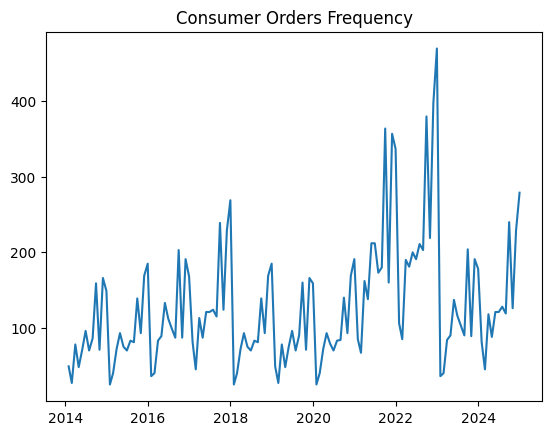

In [43]:
plt.plot(consumer_orders_grouped['Order Date'],consumer_orders_grouped['Order ID'])
plt.title('Consumer Orders Frequency')

Text(0.5, 1.0, 'Home Office Orders Frequency')

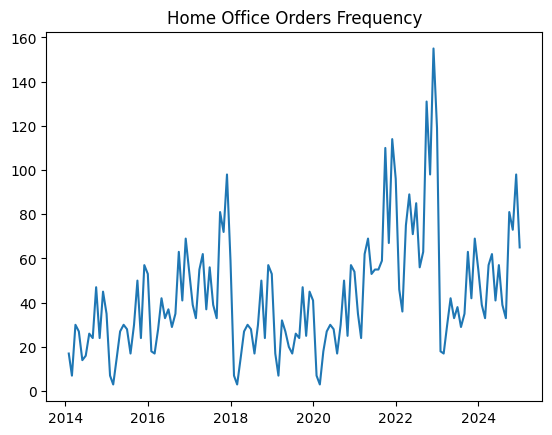

In [41]:
plt.plot(home_office_orders_grouped['Order Date'],home_office_orders_grouped['Order ID'])
plt.title('Home Office Orders Frequency')

Text(0.5, 1.0, 'Corporate Orders Frequency')

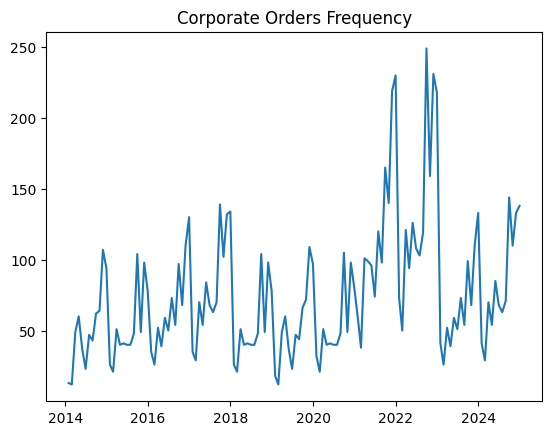

In [42]:
plt.plot(corporate_orders_grouped['Order Date'],corporate_orders_grouped['Order ID'])
plt.title('Corporate Orders Frequency')

Text(0.5, 1.0, 'Consumer Purchase Categories')

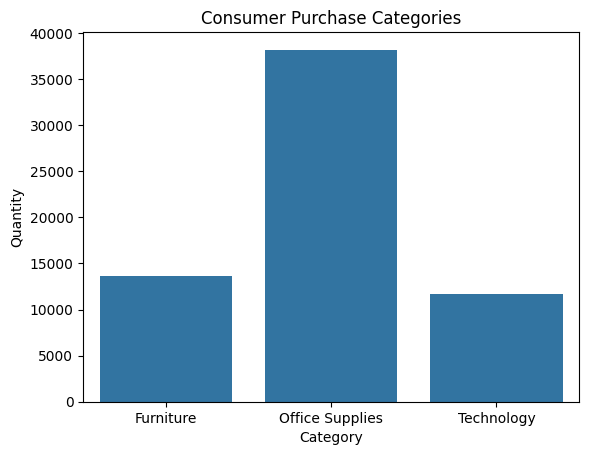

In [30]:
sns.barplot(consumer_orders.groupby('Category')['Quantity'].sum())
plt.title("Consumer Purchase Categories")

Text(0.5, 1.0, 'Home Office Purchase Categories')

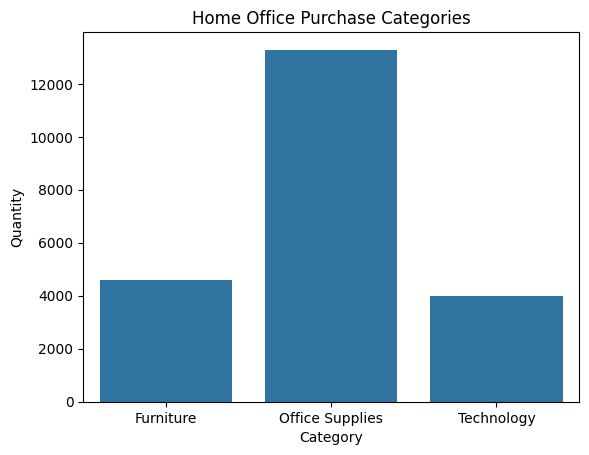

In [31]:
sns.barplot(home_office_orders.groupby('Category')['Quantity'].sum())
plt.title("Home Office Purchase Categories")

Text(0.5, 1.0, 'Corporate Purchase Categories')

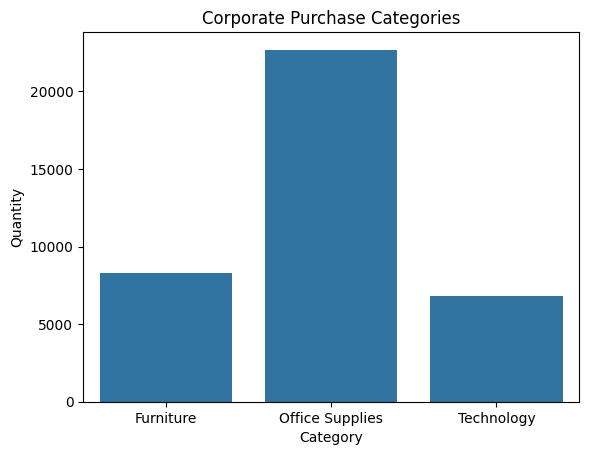

In [32]:
sns.barplot(corporate_orders.groupby('Category')['Quantity'].sum())
plt.title("Corporate Purchase Categories")

In [35]:
consumer_orders.Quantity.median()

3.0

In [36]:
home_office_orders.Quantity.median()

3.0

In [37]:
corporate_orders.Quantity.median()

3.0

In [44]:
## CREATE NEW TABLE
# group by category
quantity_per_segment = data[['Segment', 'Quantity']].groupby('Segment').sum()

# sort values by Sales
quantity_per_segment.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = quantity_per_segment.index,
             y = quantity_per_segment['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[0]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Total Number of Product Sold by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

In [45]:
## CREATE NEW TABLE
# group by category
median_quantity_per_segment = data[['Segment', 'Quantity']].groupby('Segment').median()

# sort values by Sales
median_quantity_per_segment.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = median_quantity_per_segment.index,
             y = median_quantity_per_segment['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[1]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Median Number of Product Sold by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

In [46]:
## CREATE NEW TABLE
# group by category
mean_quantity_per_segment = data[['Segment', 'Quantity']].groupby('Segment').mean()

# sort values by Sales
mean_quantity_per_segment.sort_values(by='Quantity', ascending=False, inplace=True)

## PLOT
# bar chart
fig = px.bar(x = mean_quantity_per_segment.index,
             y = mean_quantity_per_segment['Quantity'],
             template = 'simple_white', color_discrete_sequence = [colors[2]])

#Set Title and x/y axis labels
fig.update_layout(
    xaxis_title="Segment",
    yaxis_title="Quantity",
    showlegend = False,
    font = dict(
            size = 14
            ),    
    title={
        'text': "Mean Number of Product Sold by Segment",
        'y':0.95,
        'x':0.5
        }
    )

fig.show()

## Inference:
* **Analysing purchase frequency across segments has a clear spike in all segments during the time period 2022-2023. They all appear to follow similar trend .**
* **Office supplies is the clear leader in number of items ordered across all the consumer segments.**
* **Considering total number of product sold consumer segment is a clear leader**
* **Considering median and mean numbers of product sold all segments perform the same.**